In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv("/content/diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df.shape

(768, 9)

The diabetes dataset consists of 768 data points, with 9 features

# **Data Cleaning**

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

There are no nulls in the dataset

In [8]:
df['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

The ouput variable is biased.

In [9]:
df.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


Minimum values for many variables are 0. Glucose, BP, Skin Thickness, Insulin & BMI cannot have zero values. It looks like null values have been coded as zeros. So, we need to find out how many zero values are included in each variable.

In [11]:
columns_with_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

for col in columns_with_zeros:
    print(f"Number of zeros in {col}: {(df[col] == 0).sum()}")


Number of zeros in Glucose: 5
Number of zeros in BloodPressure: 35
Number of zeros in SkinThickness: 227
Number of zeros in Insulin: 374
Number of zeros in BMI: 11


Zero counts for Insulin is 374. So, dropping the variable and others too.

In [12]:
print(df.columns)

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


In [13]:
drop_indices = []

for col in columns_with_zeros:
    drop_indices += df.index[df[col] == 0].tolist()

# Remove duplicates from drop_indices
drop_indices = list(set(drop_indices))

# Drop the rows with indices in drop_indices
df_new = df.drop(df.index[drop_indices])
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 3 to 765
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               392 non-null    int64  
 1   Glucose                   392 non-null    int64  
 2   BloodPressure             392 non-null    int64  
 3   SkinThickness             392 non-null    int64  
 4   Insulin                   392 non-null    int64  
 5   BMI                       392 non-null    float64
 6   DiabetesPedigreeFunction  392 non-null    float64
 7   Age                       392 non-null    int64  
 8   Outcome                   392 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 30.6 KB


In [14]:
df_new.shape

(392, 9)

Records(rows) are decreased from 768 to 392 after removing zero values.

In [15]:
df_new.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,392.0,3.301020,3.211424,0.000,1.00000,2.0000,5.000,17.00
Glucose,392.0,122.627551,30.860781,56.000,99.00000,119.0000,143.000,198.00
BloodPressure,392.0,70.663265,12.496092,24.000,62.00000,70.0000,78.000,110.00
SkinThickness,392.0,29.145408,10.516424,7.000,21.00000,29.0000,37.000,63.00
Insulin,392.0,156.056122,118.841690,14.000,76.75000,125.5000,190.000,846.00
BMI,392.0,33.086224,7.027659,18.200,28.40000,33.2000,37.100,67.10
DiabetesPedigreeFunction,392.0,0.523046,0.345488,0.085,0.26975,0.4495,0.687,2.42
Age,392.0,30.864796,10.200777,21.000,23.00000,27.0000,36.000,81.00
Outcome,392.0,0.331633,0.471401,0.000,0.00000,0.0000,1.000,1.00


There are no zero values for Glucose, BP, Skin Thickness, Insulin & BMI.

In [16]:
df_new['Outcome'].value_counts()

Outcome
0    262
1    130
Name: count, dtype: int64

In [17]:
df_new.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,2.721374,111.431298,68.969466,27.251908,130.854962,31.750763,0.472168,28.347328
1,4.469231,145.192308,74.076923,32.961538,206.846154,35.777692,0.625585,35.938462


Mean has been increased for the features after removing zero values.

# **EDA**

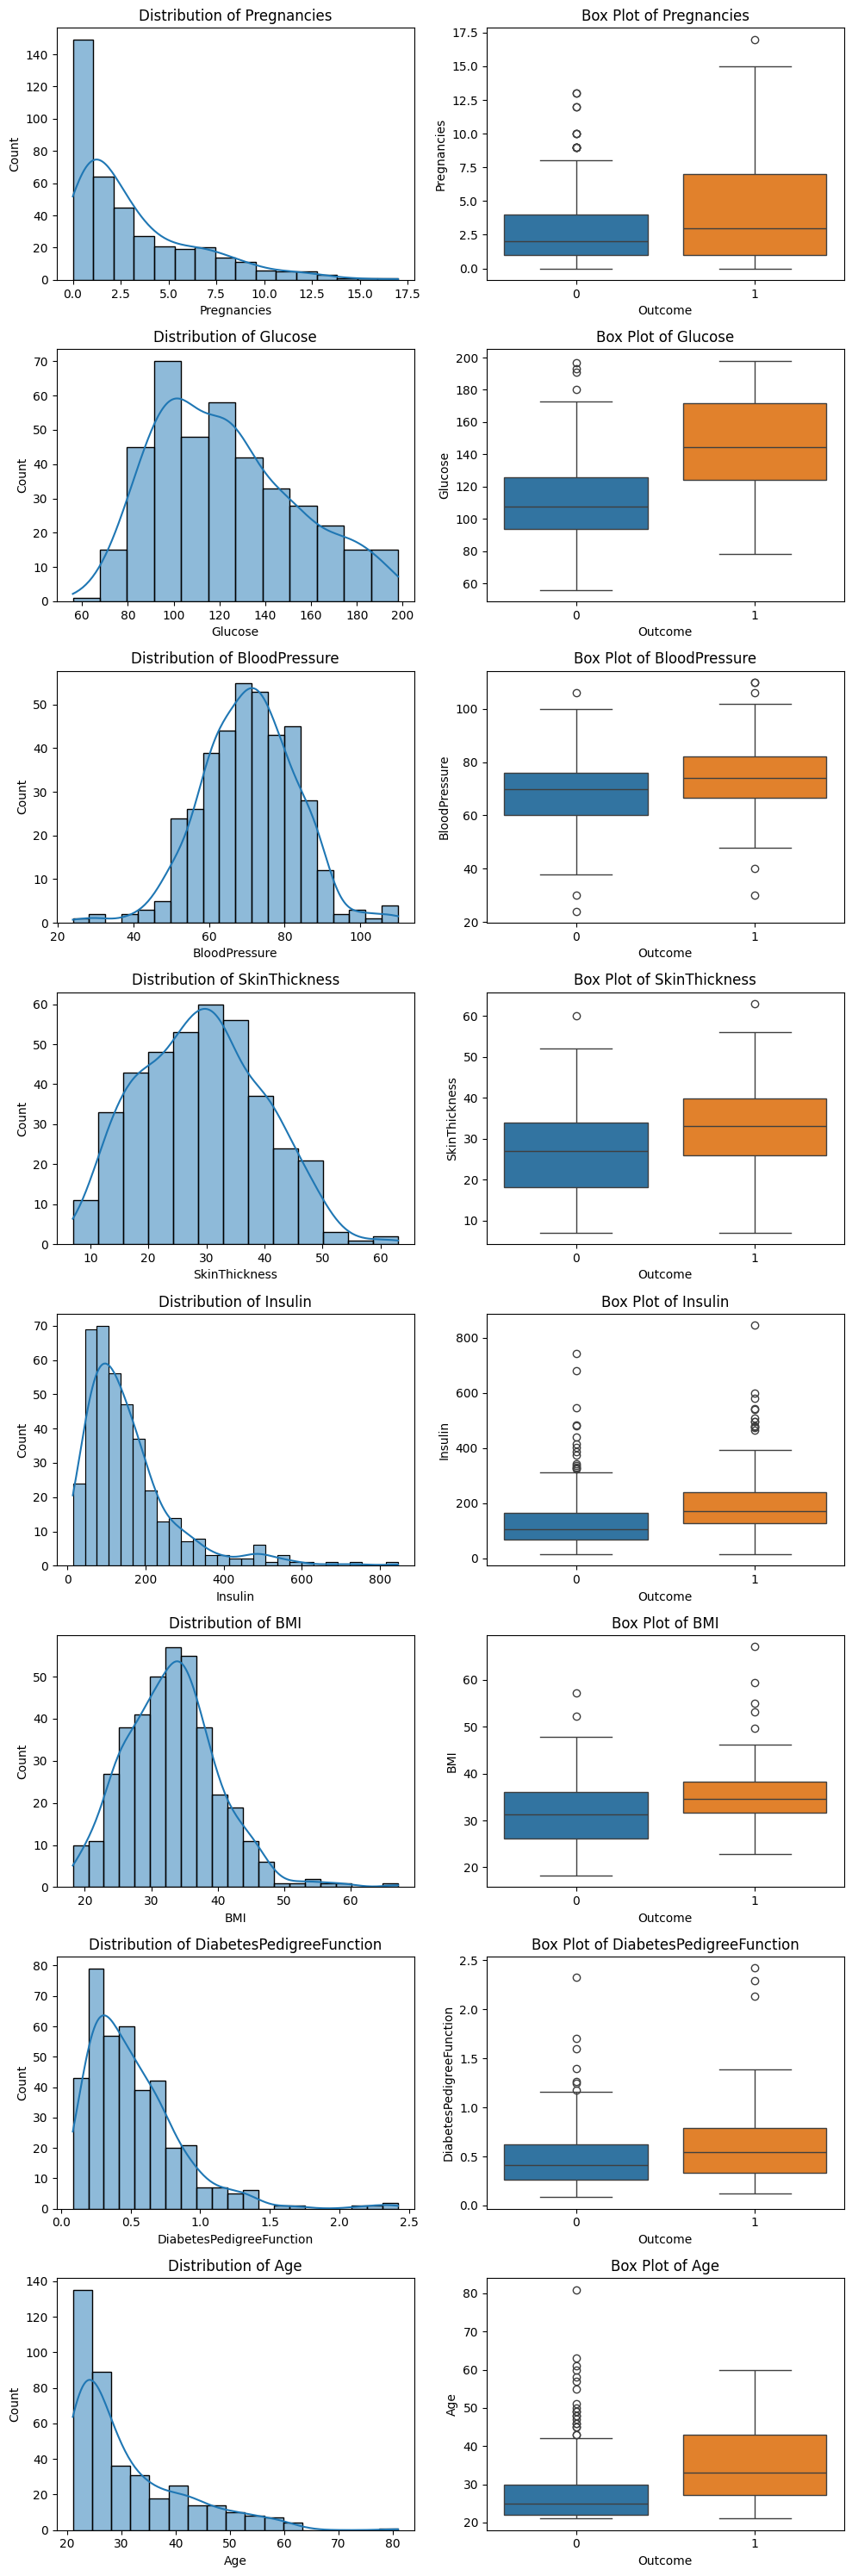

In [18]:
# Hist Plot and Box Plot for features

df_predictors = df_new[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']]

fig, axes = plt.subplots(8, 2, figsize=(10, 30))

for i, col in enumerate(df_predictors.columns):
    row = i

    # Plot the histogram
    sns.histplot(df_predictors[col], kde=True, ax=axes[row, 0])
    axes[row, 0].set_title(f'Distribution of {col}')

    # Plot the box plot
    sns.boxplot(x='Outcome', y=df_predictors[col], data=df_new, hue='Outcome', ax=axes[row, 1], legend=False)
    axes[row, 1].set_title(f'Box Plot of {col}')

plt.tight_layout()
plt.show()

**Pregnancies**

* From the histogram, data is right skewed. Even there are women greater than 21 yrs, count of pregnancy is zero for most of the people. From this it can be said that there might be many unmarried.
* From box plot, it can be said that as number of pregnencies increase, women tend to be diabetic. There are few outliers. Some non-diabetic women have had more pregenancies.

**Glucose**
* From the histogram, data is slightly skewed to the right. There are people with more than 90 glucose level.
* From box plot it can be said that diabetic patients have glucose levels greater than 120 (normal glucose level is between 70-100 mm). There are outliers. Some non-diabetic women have had more glucose levels.

**Blood pressure**
* From the histogram, data is normally distributed. There are people with more than 65 BP.
* From box plot it can be said that diabetic patients have BP levels greater than 70 (normal BP is 80/120 mm Hg). People with non-daibeties also have BP levels greater than 70 and less than 80. There are few outliers. Some non-diabetic women have had more BP levels and some diabetic women have had low BP levels.

**Skin Thickness**
* From the histogram, data is slightly skewed to the right. More people have skin thickness less han 49.
* Box plot is similar to BP, people who are not diabetic have lower skin thickness from 20-35. Also, people who are diabetic have lower skin thickness of 30. There are few outliers. Some non-diabetic women have had more skin thickness.

**Insulin**
* From the histogram, data is right skewed. Most of the data is between 14-400.
* From box plot, it can be said that diabetic patients have insulin levels greater than 200 (normal insulin level is 2-20 µU/mL). There are many outliers. Some non-diabetic women have had more insulin levels and some diabetic women have had high and low insulin levels.

**BMI**
* From the histogram, data is right skewed. Most of the data is between 18.2-48.5.
* From box plot, it can be said that diabetic patients have BMI levels greater than 33 (normal BMI is 18.5 and 24.9). There are outliers. Some non-diabetic women have had more BMI.

**Diabetes Pedigree Function**
* From the histogram, data is right skewed.
* From box plot, it can be said that diabetic patients have low and high Diabetes Pedigree Function. There are outliers. Some non-diabetic women have had more Diabetes Pedigree Function.

**Age**
* From the histogram, data is right skewed. Most of the data is between 18.21-62.
* From box plot, it can be said that diabetic patients have age greater than 30 and there are also people with age less than 30 are diabetic. There are outliers. Some non-diabetic women have had more age.

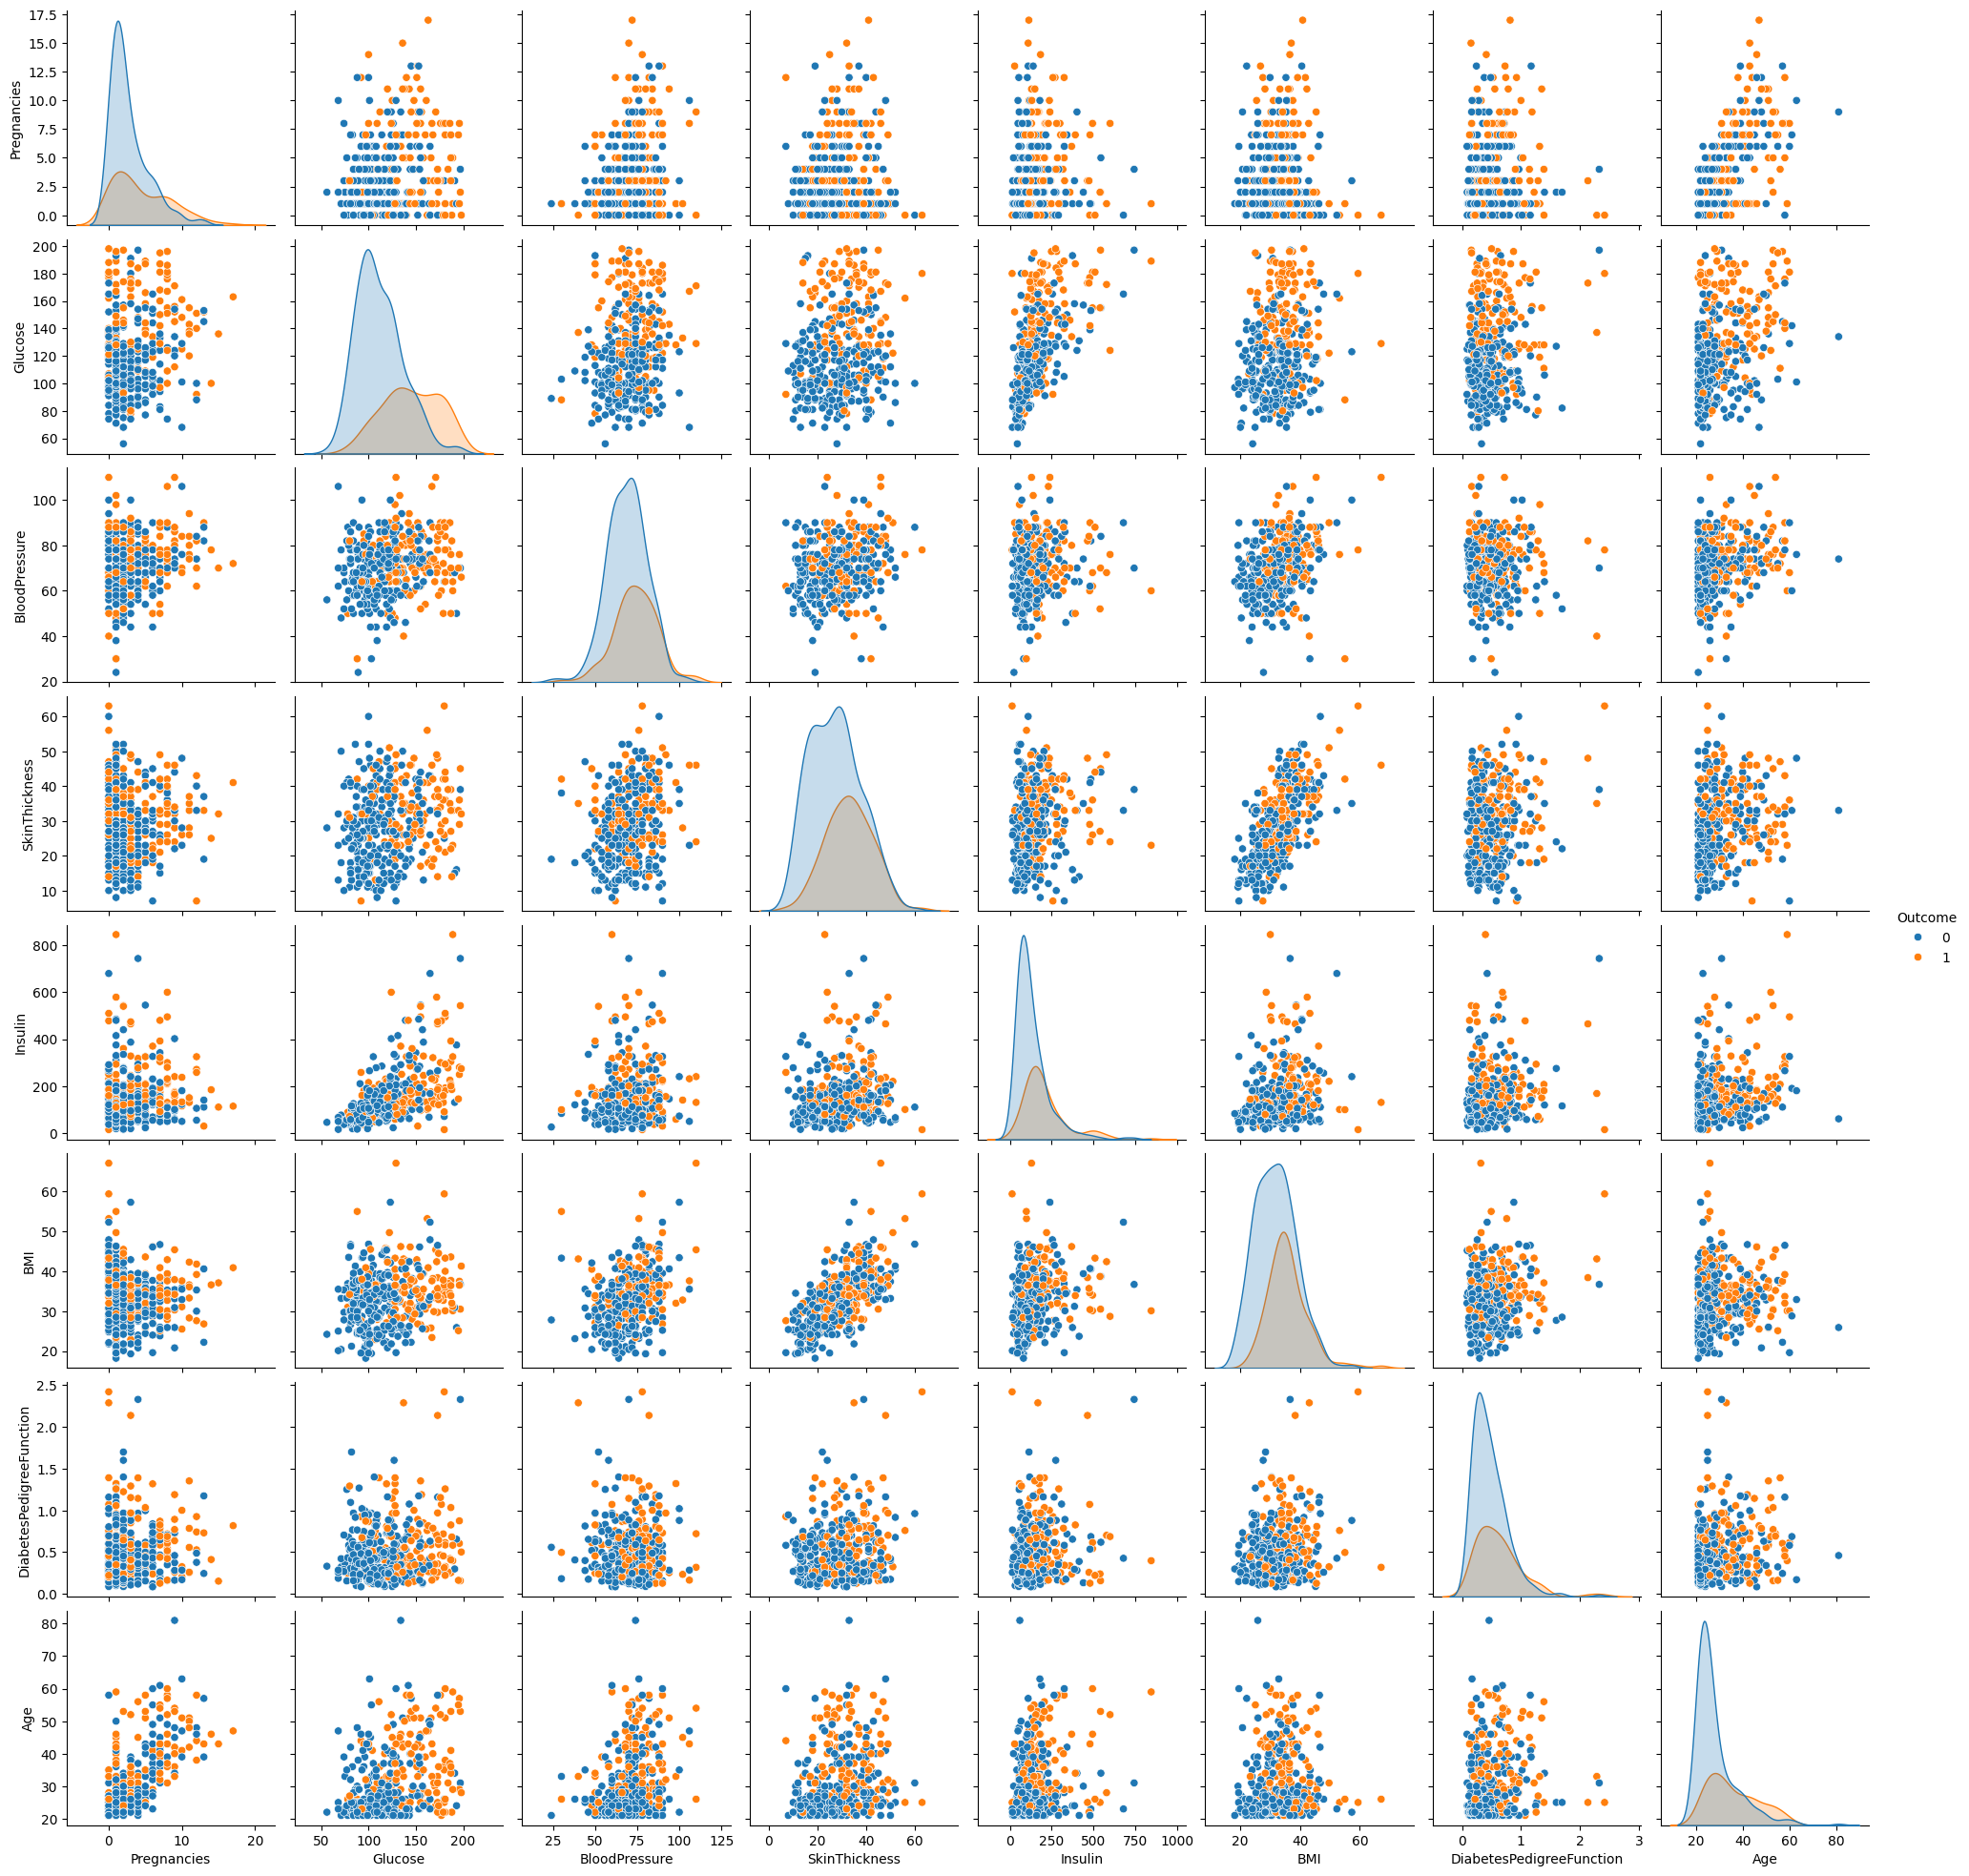

In [19]:
# pair plot
sns.pairplot(df_new, hue='Outcome')

From pair plot, BMI & SkinThickness, Pregnancies & Age, Glucose & Insulin seem to have positive linear relationships.

<Axes: >

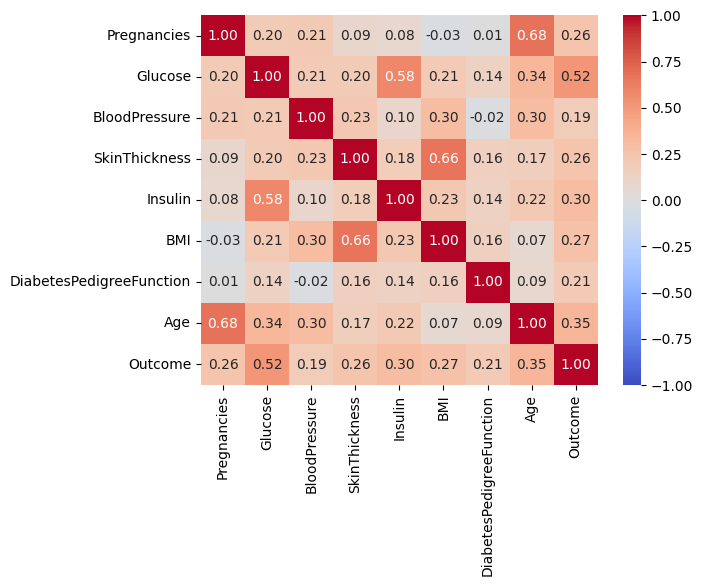

In [20]:
sns.heatmap(df_new.corr(), annot=True, fmt='.2f', cmap='coolwarm', vmin=-1, vmax=1, square=False)

Strongest correlation:

* Age x pregnancies (0.68) - Older women tend to have higher number of pregnancies.
* Skin fold thickness x BMI (0.66) - Women with higher skin fold thickness value have higher BMI (overweight/obese).
* Glucose x insulin (0.58) Women having higher level of glucose have higher insulin.
* Glucose x outcome (0.52) - Women having higher level of glucose tend to have higher chance of getting diabetes.

Negative correlation:

* BMI x Pregnancies (-0.03) - As Pregnancies increses BMI decreases.
* Blood Pressure x Diabetes Pedigree Function (-0.02) - As Diabetes Pedigree Function increses Blood Pressure decreases.

# **Feature Engineering**

In [22]:
# Create empty lists
Nutritional_status = []
Glucose_level = []
Age_group = []

# Iterate over the DataFrame rows
for _, row in df_new.iterrows():
    # Get the BMI value
    bmi = row['BMI']
    # Classify the BMI value
    if bmi < 18.5:
      Nutritional_status.append("Underweight")
    elif bmi >= 18.5 and bmi < 25:
      Nutritional_status.append("Normal")
    elif bmi >= 25 and bmi < 30:
      Nutritional_status.append("Overweight")
    else:
      Nutritional_status.append("Obese")

    # Get the Glucose value
    glucose = row['Glucose']
    # Classify the Glucose value
    if glucose <= 140:
      Glucose_level.append("Normal")
    elif glucose > 140 and glucose <= 199:
      Glucose_level.append("Impaired Glucose Tolerance")
    else:
      Glucose_level.append("Diabetes")

    # Get the Age value
    age = row['Age']
    # Classify the Age value
    if age < 30:
      Age_group.append("Young")
    elif age >= 30 and age < 60:
      Age_group.append("Adult")
    else:
      Age_group.append("Senior")

# Add the new lists as new columns in the DataFrame
df_new.insert(6, "BMI_Status", Nutritional_status)
df_new.insert(2, "Glucose_Level", Glucose_level)
df_new.insert(10, "Age_Group", Age_group)

# Display the first five rows of the DataFrame
df_new.head()


,Pregnancies,Glucose,Glucose_Level,BloodPressure,SkinThickness,Insulin,BMI,BMI_Status,DiabetesPedigreeFunction,Age,Age_Group,Outcome
3,1,89,Normal,66,23,94,28.1,Overweight,0.167,21,Young,0
4,0,137,Normal,40,35,168,43.1,Obese,2.288,33,Adult,1
6,3,78,Normal,50,32,88,31.0,Obese,0.248,26,Young,1
8,2,197,Impaired Glucose Tolerance,70,45,543,30.5,Obese,0.158,53,Adult,1
13,1,189,Impaired Glucose Tolerance,60,23,846,30.1,Obese,0.398,59,Adult,1


In [23]:
df_new['BMI_Status'].value_counts()

BMI_Status
Obese          262
Overweight      85
Normal          44
Underweight      1
Name: count, dtype: int64

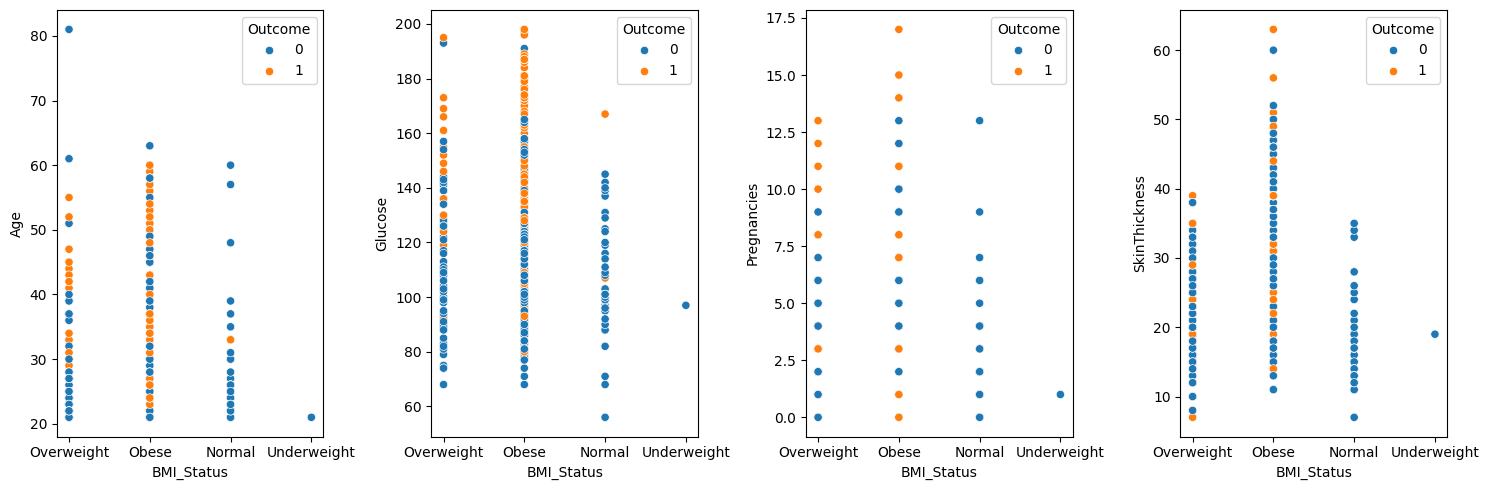

In [113]:
fig, axes = plt.subplots(1, 4, figsize=(15, 5))

sns.scatterplot(x='BMI_Status', y='Age', hue='Outcome', data=df_new, ax=axes[0])
sns.scatterplot(x='BMI_Status', y='Glucose', hue='Outcome', data=df_new, ax=axes[1])
sns.scatterplot(x='BMI_Status', y='Pregnancies', hue='Outcome', data=df_new, ax=axes[2])
sns.scatterplot(x='BMI_Status', y='SkinThickness', hue='Outcome', data=df_new, ax=axes[3])

plt.tight_layout()
plt.show()

In [86]:
Normal_BMI = ((df_new['BMI'] >= 18.5 ) & (df_new['BMI'] < 25) & (df_new['Outcome'] == 1)).sum()
print("Normal BMI (>=18.5 & <25) but are diabetic:",Normal_BMI)

Normal BMI (>=18.5 & <25) but are diabetic: 2


Women with normal BMI levels have very low chances of getting diabetes.

In [25]:
df_new['Glucose_Level'].value_counts()

Glucose_Level
Normal                        287
Impaired Glucose Tolerance    105
Name: count, dtype: int64

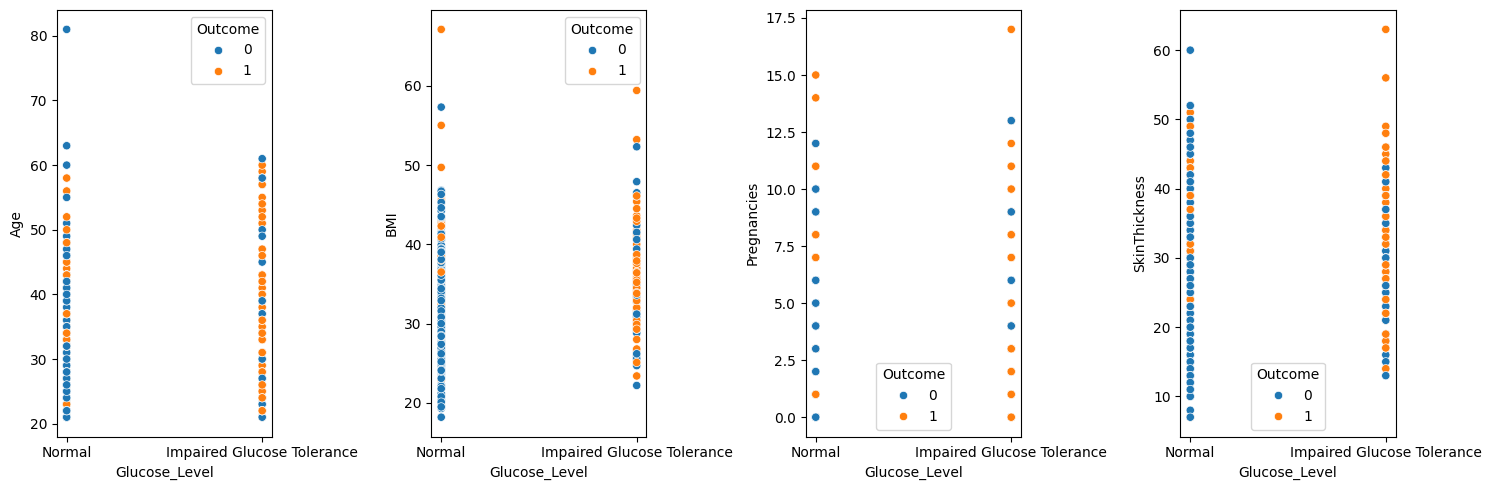

In [115]:
fig, axes = plt.subplots(1, 4, figsize=(15, 5))

sns.scatterplot(x='Glucose_Level', y='Age', hue='Outcome', data=df_new, ax=axes[0])
sns.scatterplot(x='Glucose_Level', y='BMI', hue='Outcome', data=df_new, ax=axes[1])
sns.scatterplot(x='Glucose_Level', y='Pregnancies', hue='Outcome', data=df_new, ax=axes[2])
sns.scatterplot(x='Glucose_Level', y='SkinThickness', hue='Outcome', data=df_new, ax=axes[3])

plt.tight_layout()
plt.show()

In [102]:
Impaired_Glucose_Tolerance_Diabetic = ((df_new['Glucose'] > 140 ) & (df_new['Glucose'] <= 199) & (df_new['Outcome'] == 0)).sum()
print("Impaired glucose tolerance levels (>140 & <=199) but are not diabetic:",Impaired_Glucose_Tolerance_Diabetic)

Impaired glucose tolerance levels (>140 & <=199) but are diabetic: 35


Some of the women with "impaired glucose tolerance" levels does not get diabetes but most of them in this level are prone to diabetes.

In [88]:
Normal_Glucose_Diabetic = ((df_new['Glucose'] <= 140) & (df_new['Outcome'] == 1)).sum()
print("Normal glucose levels (<=140) but are diabetic:",Normal_Glucose_Diabetic)

Normal glucose levels (<=140) but are diabetic: 60


Women with normal glucose levels have very low chances of getting diabetes.

In [28]:
df_new['Age_Group'].value_counts()

Age_Group
Young     238
Adult     149
Senior      5
Name: count, dtype: int64

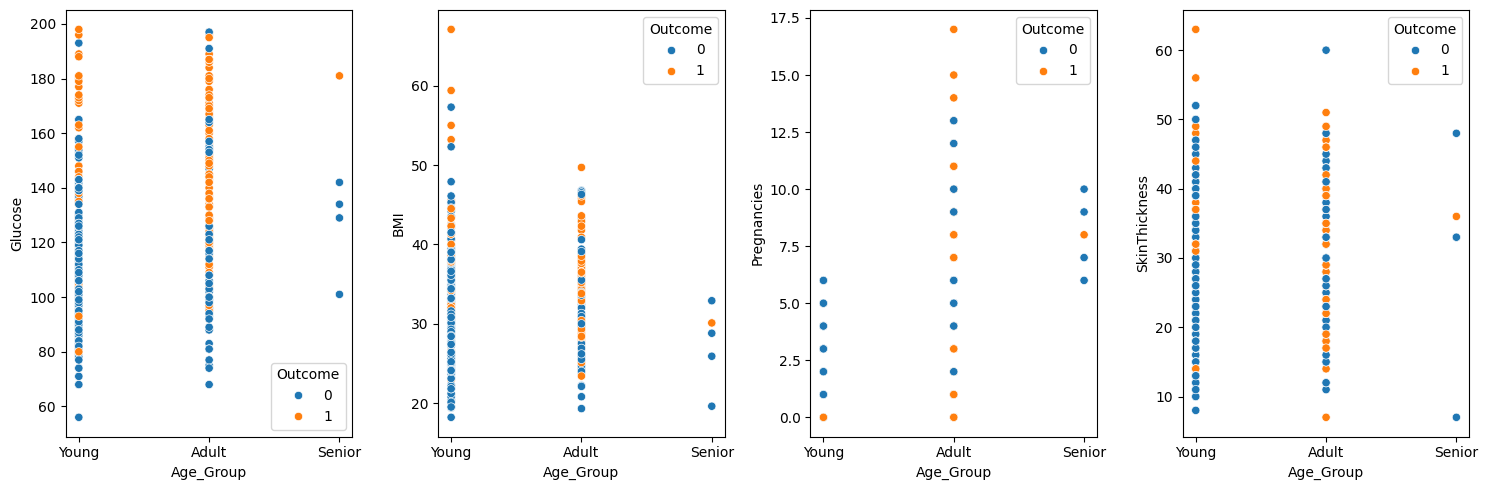

In [116]:
fig, axes = plt.subplots(1, 4, figsize=(15, 5))

sns.scatterplot(x='Age_Group', y='Glucose', hue='Outcome', data=df_new, ax=axes[0])
sns.scatterplot(x='Age_Group', y='BMI', hue='Outcome', data=df_new, ax=axes[1])
sns.scatterplot(x='Age_Group', y='Pregnancies', hue='Outcome', data=df_new, ax=axes[2])
sns.scatterplot(x='Age_Group', y='SkinThickness', hue='Outcome', data=df_new, ax=axes[3])

plt.tight_layout()
plt.show()

In [90]:
Young_Age = ((df_new['Age'] < 30) & (df_new['Outcome'] == 1)).sum()

print("Young (less than 30 years) but are diabetic:",Young_Age)

Young (less than 30 years) but are diabetic: 48


#**Model Selection**


In [30]:
X = df_new.drop(["Outcome", "BMI_Status", "Glucose_Level", "Age_Group"], axis=1)
y = df_new[("Outcome")]
X.shape

(392, 8)

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [32]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((313, 8), (79, 8), (313,), (79,))

In [40]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression, Lasso
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

models = [
    {
        'name': 'KNN',
        'model': KNeighborsClassifier()
    },
    {
        'name': 'Logistic Regression',
        'model': LogisticRegression()
    },
    {
        'name': 'SVM',
        'model': SVC()
    },
    {
        'name': 'Decision Tree',
        'model': DecisionTreeClassifier(random_state=0)
    },
    {
        'name': 'Random Forest',
        'model': RandomForestClassifier(random_state=0)
    }
]

# Training and evaluating the models
results = []

for model_info in models:
    model_info['model'].fit(X_train, y_train)
    model = model_info['model']
    train_accuracy = accuracy_score(y_train, model.predict(X_train))
    test_accuracy = accuracy_score(y_test, model.predict(X_test))

    if hasattr(model, 'feature_importances_'):
        best_features = model.feature_importances_
    else:
        best_features = None

    results.append({
        'Model': model_info['name'],
        'Train Accuracy': train_accuracy,
        'Test Accuracy': test_accuracy,
        'Selected Features': best_features
    })

results_df = pd.DataFrame(results)
results_df

,Model,Train Accuracy,Test Accuracy,Selected Features
0,KNN,0.795527,0.746835,None
1,Logistic Regression,0.792332,0.772152,None
2,SVM,0.776358,0.759494,None
3,Decision Tree,1.000000,0.784810,"[0.03241649223792081, 0.4128455402781926, 0.07..."
4,Random Forest,1.000000,0.784810,"[0.07112427945572582, 0.24905423110368205, 0.0..."


* Decision Tree and Random Forest models are overfitting using default parameters/values.
* Logistic Regression got highest test accuracy of 77.2% among all the models.


No feature importances available for KNN
No feature importances available for Logistic Regression
No feature importances available for SVM


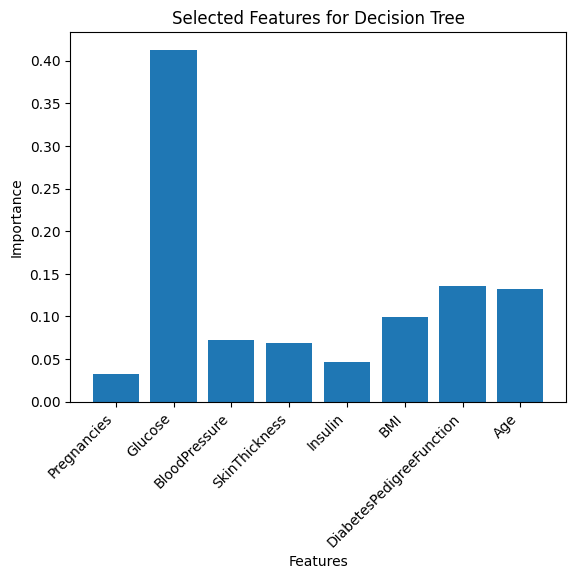

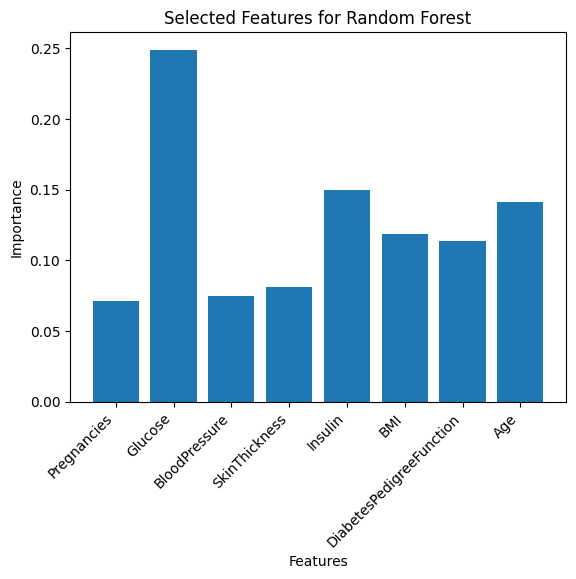

In [41]:
feature_names = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
# Extract the selected features for each model
model_features = {}
for i, row in results_df.iterrows():
    model_features[row['Model']] = row['Selected Features']

# Plot the selected features for each model
for model, features in model_features.items():
    if features is not None:
        plt.bar(range(len(features)), features)
        plt.xticks(range(len(features)), feature_names, rotation=45, ha='right')
        plt.title(f'Selected Features for {model}')
        plt.xlabel('Features')
        plt.ylabel('Importance')
        plt.show()
    else:
        print(f"No feature importances available for {model}")

# **Model Selection with hyper parameter tuning**

In [46]:
models1 = [
    {
        'name': 'KNN',
        'model': KNeighborsClassifier(),
        'params': {'n_neighbors': range(1, 11)}
    },
    {
        'name': 'Logistic Regression',
        'model': LogisticRegression(),
        'params': {'C': [0.1, 1, 10, 100]}
    },
    {
        'name': 'SVM',
        'model': SVC(),
        'params': {'C': [0.1, 1, 10, 100, None], 'kernel': ['linear', 'rbf']}
    },
    {
        'name': 'Decision Tree',
        'model': DecisionTreeClassifier(random_state=0),
        'params': {'max_depth': [3, 5, None]}
    },
    {
        'name': 'Random Forest',
        'model': RandomForestClassifier(random_state=0),
        'params': {'n_estimators': [50, 100, None], 'max_depth': [3, 5, None]}
    }
]

# Training and evaluating the models
results1 = []

for model_info in models1:
    grid_search = GridSearchCV(model_info['model'], model_info['params'], cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)

    best_model = grid_search.best_estimator_
    train_accuracy = accuracy_score(y_train, best_model.predict(X_train))
    test_accuracy = accuracy_score(y_test, best_model.predict(X_test))
    best_params = grid_search.best_params_

    if hasattr(best_model, 'feature_importances_'):
        best_features = best_model.feature_importances_
    else:
        best_features = None

    results1.append({
        'Model': model_info['name'],
        'Train Accuracy': train_accuracy,
        'Test Accuracy': test_accuracy,
        'Best Hyperparameters': best_params,
        'Selected Features': best_features
    })
results_df1 = pd.DataFrame(results1)
results_df1

,Model,Train Accuracy,Test Accuracy,Best Hyperparameters,Selected Features
0,KNN,0.782748,0.772152,{'n_neighbors': 9},None
1,Logistic Regression,0.785942,0.772152,{'C': 100},None
2,SVM,0.792332,0.784810,"{'C': 10, 'kernel': 'linear'}",None
3,Decision Tree,0.837061,0.772152,{'max_depth': 3},"[0.0, 0.6282168982776855, 0.0, 0.0706171139587..."
4,Random Forest,0.993610,0.822785,"{'max_depth': None, 'n_estimators': 50}","[0.06698664412524148, 0.24650344159662094, 0.0..."


* Random Forest model is overfitting using ('max_depth'=None and 'n_estimators'=50) hyper parameters.
* SVM got highest test accuracy of 78.5% when using ('C': 10, 'kernel': 'linear') among all the models. It also got high test accuracy when compared the same without using any hyper parameters(SVM - Train Acc: 77.6,	Test Acc: 76)

No feature importances available for KNN
No feature importances available for Logistic Regression
No feature importances available for SVM


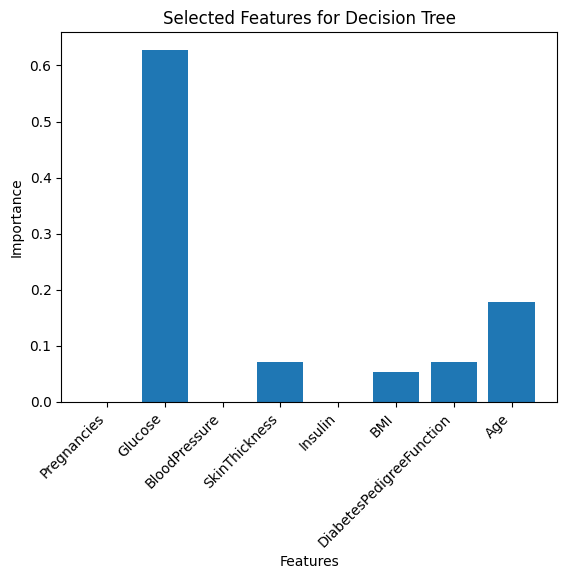

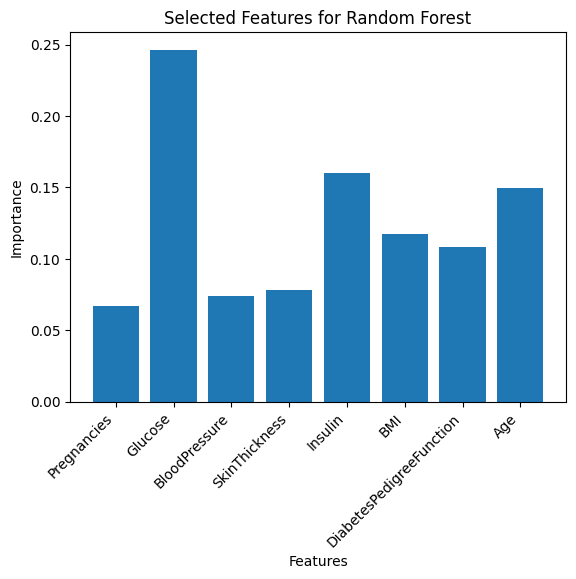

In [47]:
# Extract the selected features for each model
model_features = {}
for i, row in results_df1.iterrows():
    model_features[row['Model']] = row['Selected Features']

# Plot the selected features for each model
for model, features in model_features.items():
    if features is not None:
        plt.bar(range(len(features)), features)
        plt.xticks(range(len(features)), feature_names, rotation=45, ha='right')
        plt.title(f'Selected Features for {model}')
        plt.xlabel('Features')
        plt.ylabel('Importance')
        plt.show()
    else:
        print(f"No feature importances available for {model}")

# **Data Preprocessing and Model Selection**

In [66]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

models2 = [
    {
        'name': 'KNN',
        'model': KNeighborsClassifier()
    },
    {
        'name': 'Logistic Regression',
        'model': LogisticRegression()
    },
    {
        'name': 'SVM',
        'model': SVC()
    },
    {
        'name': 'Decision Tree',
        'model': DecisionTreeClassifier(random_state=0)
    },
    {
        'name': 'Random Forest',
        'model': RandomForestClassifier(random_state=0)
    }
]

# Training and evaluating the models
results2 = []

for model_info in models2:
    model_info['model'].fit(X_train_scaled, y_train)
    model = model_info['model']
    train_accuracy = accuracy_score(y_train, model.predict(X_train_scaled))
    test_accuracy = accuracy_score(y_test, model.predict(X_test_scaled))

    results2.append({
        'Model': model_info['name'],
        'Train Accuracy': train_accuracy,
        'Test Accuracy': test_accuracy
    })

results_df2 = pd.DataFrame(results2)
results_df2

,Model,Train Accuracy,Test Accuracy
0,KNN,0.811502,0.784810
1,Logistic Regression,0.789137,0.784810
2,SVM,0.837061,0.810127
3,Decision Tree,1.000000,0.746835
4,Random Forest,1.000000,0.797468


* Decision Tree and Random Forest models are overfitting using default parameters.
* While using Standard Scalar SVM accuracy got even better with 81% using default parameters.

#**A/B Testing**

In [ ]:
# import streamlit as st

# best_svm_index = results_df2[results_df2['Model'] == 'SVM']['Test Accuracy'].idxmax()
# # print(best_svm_index)
# best_svm_model = models2[best_svm_index]['model']
# # print(best_svm_model)

# # Define the diabetes prediction function
# def diabetes_prediction(input_data):
#     input_data_as_numpy_array = np.asarray(input_data)
#     input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

#     # standardize the input data
#     std_data = scaler.transform(input_data_reshaped)
#     # print(std_data)
#     prediction = best_svm_model.predict(std_data)  # Now best_svm_model is defined
#     return 'The person is not diabetic' if prediction[0] == 0 else 'The person is diabetic'

# # Create a Streamlit app
# st.title('Diabetes Prediction App')

# # Get inputs from the user
# pregnancies = st.number_input('Enter the number of pregnancies:', min_value=0, max_value=20)
# glucose = st.number_input('Enter the glucose level:', min_value=1, max_value=200)
# blood_pressure = st.number_input('Enter the blood pressure level:', min_value=1, max_value=123)
# skin_thickness = st.number_input('Enter the skin thickness:', min_value=1, max_value=100)
# insulin = st.number_input('Enter the insulin level:', min_value=1, max_value=800)
# bmi = st.number_input('Enter the BMI:', min_value=0, max_value=70)
# diabetes_pedigree_function = st.number_input('Enter the diabetes pedigree function:', min_value=0.0, max_value=2.5)
# age = st.number_input('Enter the age:', min_value=1, max_value=100)

# # Display normal levels for each variable
# st.write('Normal levels:')
# st.write('- Glucose: 70-110 mg/dL')
# st.write('- Blood pressure: 80-120 mmHg')
# st.write('- Skin thickness: 10-15 mm')
# st.write('- Insulin: 2-20 µU/mL')
# st.write('- BMI: 18.5-24.9 kg/m^2')

# # Make predictions and display results
# if st.button('Predict'):
#     input_data = [pregnancies, glucose, blood_pressure, skin_thickness, insulin, bmi, diabetes_pedigree_function, age]
#     prediction = diabetes_prediction(input_data)
#     st.write(prediction)

#     if prediction == 'The person is diabetic':
#         st.write('**Precautions to take if you are diabetic:**')
#         st.write('- Eat a healthy diet')
#         st.write('- Get regular exercise')
#         st.write('- Maintain a healthy weight')
#         st.write('- Take medication as prescribed by your doctor')
#         st.write('- Monitor your blood sugar levels regularly')


In [133]:
# Identify key risk factors
key_risk_factors = []
for i, row in results_df1.iterrows():
    if row['Test Accuracy'] >= 0.75 and row['Selected Features'] is not None:
        for feature, importance in zip(feature_names, row['Selected Features']):
            if importance > 0.1:
                key_risk_factors.append(feature)

risk_factors=list(set(key_risk_factors))
print("Key Risk Factors:", risk_factors)

# Identify high-risk groups
high_risk_groups = []
for i, row in df_new.iterrows():
    risk_factor_count = 0
    for feature in key_risk_factors:
        if row[feature] > df_new[feature].mean():
            risk_factor_count += 1
    if risk_factor_count >= len(key_risk_factors) // 2:
        high_risk_groups.append(i)

# Get unique high-risk groups with age groups
high_risk_groups_with_age = []
for i in high_risk_groups:
    age_group = df_new.loc[i, 'Age_Group']
    high_risk_groups_with_age.append(f"{age_group}")

unique_high_risk_groups_with_age = list(set(high_risk_groups_with_age))
print("High-Risk Age Groups:", unique_high_risk_groups_with_age)


Key Risk Factors: ['Glucose', 'Insulin', 'BMI', 'Age', 'DiabetesPedigreeFunction']
High-Risk Age Groups: ['Senior', 'Adult', 'Young']


In [192]:
import sqlite3
import csv

# Load the trained SVM model and scaler
best_svm_index = results_df2[results_df2['Model'] == 'SVM']['Test Accuracy'].idxmax()
# print(best_svm_index)
best_svm_model = models2[best_svm_index]['model']
# print(best_svm_model)

# Connect to SQLite database
conn = sqlite3.connect("test_diabetes.db")
cursor = conn.cursor()

# Create a table to store the data if it doesn't exist
cursor.execute("""
CREATE TABLE IF NOT EXISTS diabetes_data (
    id INTEGER PRIMARY KEY,
    pregnancies INTEGER,
    glucose INTEGER,
    blood_pressure INTEGER,
    skin_thickness INTEGER,
    insulin INTEGER,
    bmi REAL,
    diabetes_pedigree_function REAL,
    age INTEGER,
    outcome INTEGER
)
""")

# Function to collect data from the user
def collect_data():
    pregnancies = int(input("Enter the number of pregnancies: "))
    glucose = int(input("Enter the glucose level: "))
    blood_pressure = int(input("Enter the blood pressure level: "))
    skin_thickness = float(input("Enter the skin thickness: "))
    insulin = int(input("Enter the insulin level: "))
    bmi = float(input("Enter the BMI: "))
    diabetes_pedigree_function = float(input("Enter the diabetes pedigree function: "))
    age = int(input("Enter the age: "))
    return pregnancies, glucose, blood_pressure, skin_thickness, insulin, bmi, diabetes_pedigree_function, age


# Function to predict diabetes
def diabetes_prediction(input_data):
    input_data_as_numpy_array = np.asarray(input_data)
    input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

    # Standardize the input data
    std_data = scaler.transform(input_data_reshaped)
    print(std_data)
    prediction = best_svm_model.predict(std_data)
    return 0 if prediction[0] == 0 else 1

# Loop to continuously collect data from the user
while True:
    data = collect_data()
    outcome = diabetes_prediction(data)
    data_with_outcome = data + (outcome,)

    cursor.execute("""
        INSERT INTO diabetes_data (pregnancies, glucose, blood_pressure, skin_thickness, insulin, bmi, diabetes_pedigree_function, age, outcome)
        VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?)
    """, data_with_outcome)
    conn.commit()

    # Inform the user of the prediction
    print('The person is not diabetic' if outcome == 0 else 'The person is diabetic')

    continue_input = input("Do you want to continue? (y/n): ")
    if continue_input.lower() != "y":
        break

# Load the data from the database
data = pd.read_sql_query("SELECT * FROM diabetes_data", conn)
csv_path = "test_diabetes.csv"
data.to_csv(csv_path, index=False)

# Check if the data is loaded correctly

print(data.head())
conn.close()
print(f"Data successfully exported to CSV file: {csv_path}")

Enter the number of pregnancies: 17
Enter the glucose level: 199
Enter the blood pressure level: 72
Enter the skin thickness: 41
Enter the insulin level: 114
Enter the BMI: 40.9
Enter the diabetes pedigree function: 0.816
Enter the age: 47
[[ 3.74278482  2.97107458  0.19980481  1.16810607 -0.31449336  1.26814632
   0.95484498  1.70694722]]
The person is diabetic
Do you want to continue? (y/n): y
Enter the number of pregnancies: 12
Enter the glucose level: 84
Enter the blood pressure level: 70
Enter the skin thickness: 40
Enter the insulin level: 271
Enter the BMI: 4111.8
Enter the diabetes pedigree function: 0.742
Enter the age: 38
[[ 2.37135624e+00 -1.15554406e+00  5.36512923e-02  1.07117290e+00
   1.39407482e+00  6.20705039e+02  7.28320193e-01  7.94436340e-01]]
The person is not diabetic
Do you want to continue? (y/n): n
   id  pregnancies  glucose  blood_pressure  skin_thickness  insulin   bmi  \
0   1            5      166              72              19      175  25.8   
1   2    

In [194]:
# # Create a bar chart to show the number of people with diabetes in each age group
# data['age_group'] = pd.cut(data['age'], bins=[0, 20, 30, 40, 50, 60, 70, 80, 90, 100], labels=["0-20", "21-30", "31-40", "41-50", "51-60", "61-70", "71-80", "81-90", "91-100"])
# age_group_counts = data.groupby('age_group')['outcome'].sum()

# sns.barplot(x='age_group', y='glucose', hue='outcome', data=data)
# plt.xlabel("Age Group")
# plt.ylabel("Glucose Level")
# plt.title("Age Group vs Glucose Level by Outcome")
# plt.show()

# # Since we don't have a date column, let's assume you want to see the trend in glucose levels based on IDs (as a proxy for time)
# sns.scatterplot(x='glucose', y='bmi', hue='outcome', data=data)
# plt.xlabel("Blood Glucose Level")
# plt.ylabel("Diabetes Pedigree Function")
# plt.title("Blood Glucose Levels vs Diabetes Pedigree Function by Outcome")
# plt.show()